In [1]:
from multiprocessing import Pool
import numpy as np
from graph import Circle, Grid, RandomRegular, GraphByDegrees
from viz import draw_data
from utils import Timer, partition
from engine_exp import fun_exp
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>

In [2]:
def calc(alphas, bs, graphs, T, pool_size=32):
    pool = Pool(pool_size)
    res = []
    timer = Timer()
    
    cur = 0
    
    for graph in graphs:
        local_timer = Timer()
        
        res.append(pool.map(fun_exp, [(graph, b, alpha, T) for b in bs for alpha in alphas]))
        
        t = local_timer.measure()
        cur += 1
        rem = len(graphs) - cur
        print(f'#{cur} passed in {local_timer.measure()},  projected end in {rem * t / 60} minutes', flush=True)
        
    timer.print_elapsed()
    return np.array(res)

In [3]:
def plot_mean_and_std(bs, data, last):
    fig, axs = plt.subplots(2)
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[0].plot(bs, cur, '.-')
    
    cur = np.apply_along_axis(lambda x: np.std(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[1].plot(bs, cur, '.-')

In [4]:
def plot_avg_deg_distribuion(graphs, max_deg=20):
    s = [0] * max_deg
    for graph in graphs:
        for d, cnt in graph.degrees().items():
            if d < max_deg:
                s[d] += cnt
    s = np.array(s)
    s = s / sum(s)
    #for i in range(1, len(s)):
    #    s[i] += s[i - 1]
    plt.scatter(np.arange(len(s)), s, c='red')

In [5]:
def plot_means(bs, data, last):
    fig, ax = plt.subplots()
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    for t in cur:
        ax.scatter(bs, t, s=1, alpha=.05, c='red')
        
    cur = np.apply_along_axis(np.mean, 0, cur)
    ax.plot(bs, cur, '-')
    plt.show()

In [6]:
graphs = Pool(32).map(GraphByDegrees, [{2: 300, 3: 300} for _ in range(10)])

In [7]:
res = calc([.1], partition(0, 10, 256), graphs, 100)

#1 passed in 34.024924993515015,  projected end in 5.103738069534302 minutes
#2 passed in 33.50892162322998,  projected end in 4.467855676015218 minutes
#3 passed in 33.49529480934143,  projected end in 3.907783893744151 minutes
#4 passed in 33.77485752105713,  projected end in 3.377485251426697 minutes
#5 passed in 33.450336933135986,  projected end in 2.7875277201334634 minutes
#6 passed in 34.376070499420166,  projected end in 2.2917377312978107 minutes
#7 passed in 33.5724515914917,  projected end in 1.6786224007606507 minutes
#8 passed in 33.72892689704895,  projected end in 1.1242974440256754 minutes
#9 passed in 33.48322558403015,  projected end in 0.5580536723136902 minutes
#10 passed in 33.50961780548096,  projected end in 0.0 minutes
time elapsed = 336.9339370727539


<IPython.core.display.Javascript object>


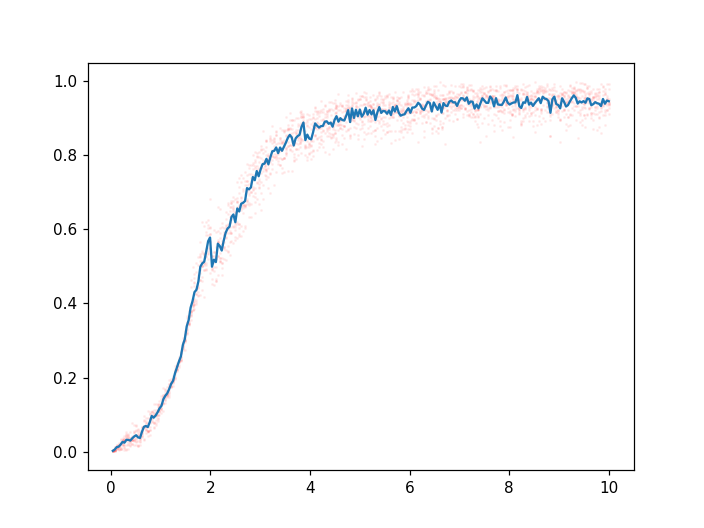

In [8]:
plot_means(partition(0, 10, 256), res, 10)

<IPython.core.display.Javascript object>


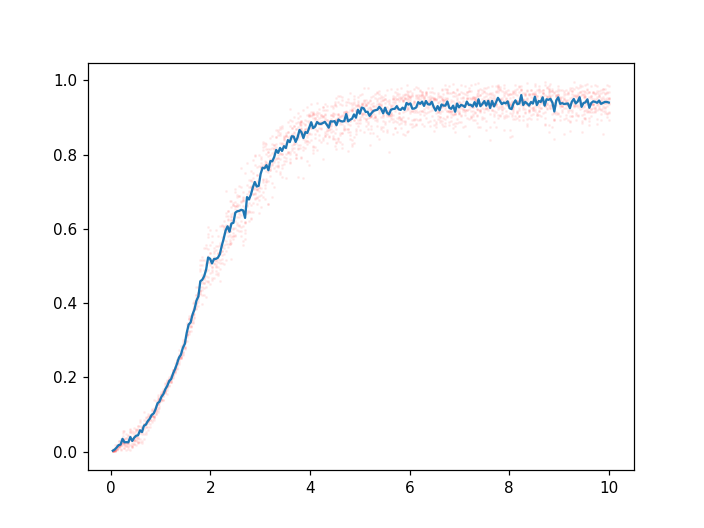

In [8]:
plot_means(partition(0, 10, 256), res, 10)